In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split  # Fixed import typo here
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score  # Fixed import typo here

np.random.seed(42)
from matplotlib import style
style.use('fivethirtyeight')


In [2]:
data_dir = 'Desktop/Traffic cnn'
train_path = 'Desktop/Traffic cnn/Train'
test_path = 'Desktop/Traffic cnn/Test'

#Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [3]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh 3.5 tons'
}


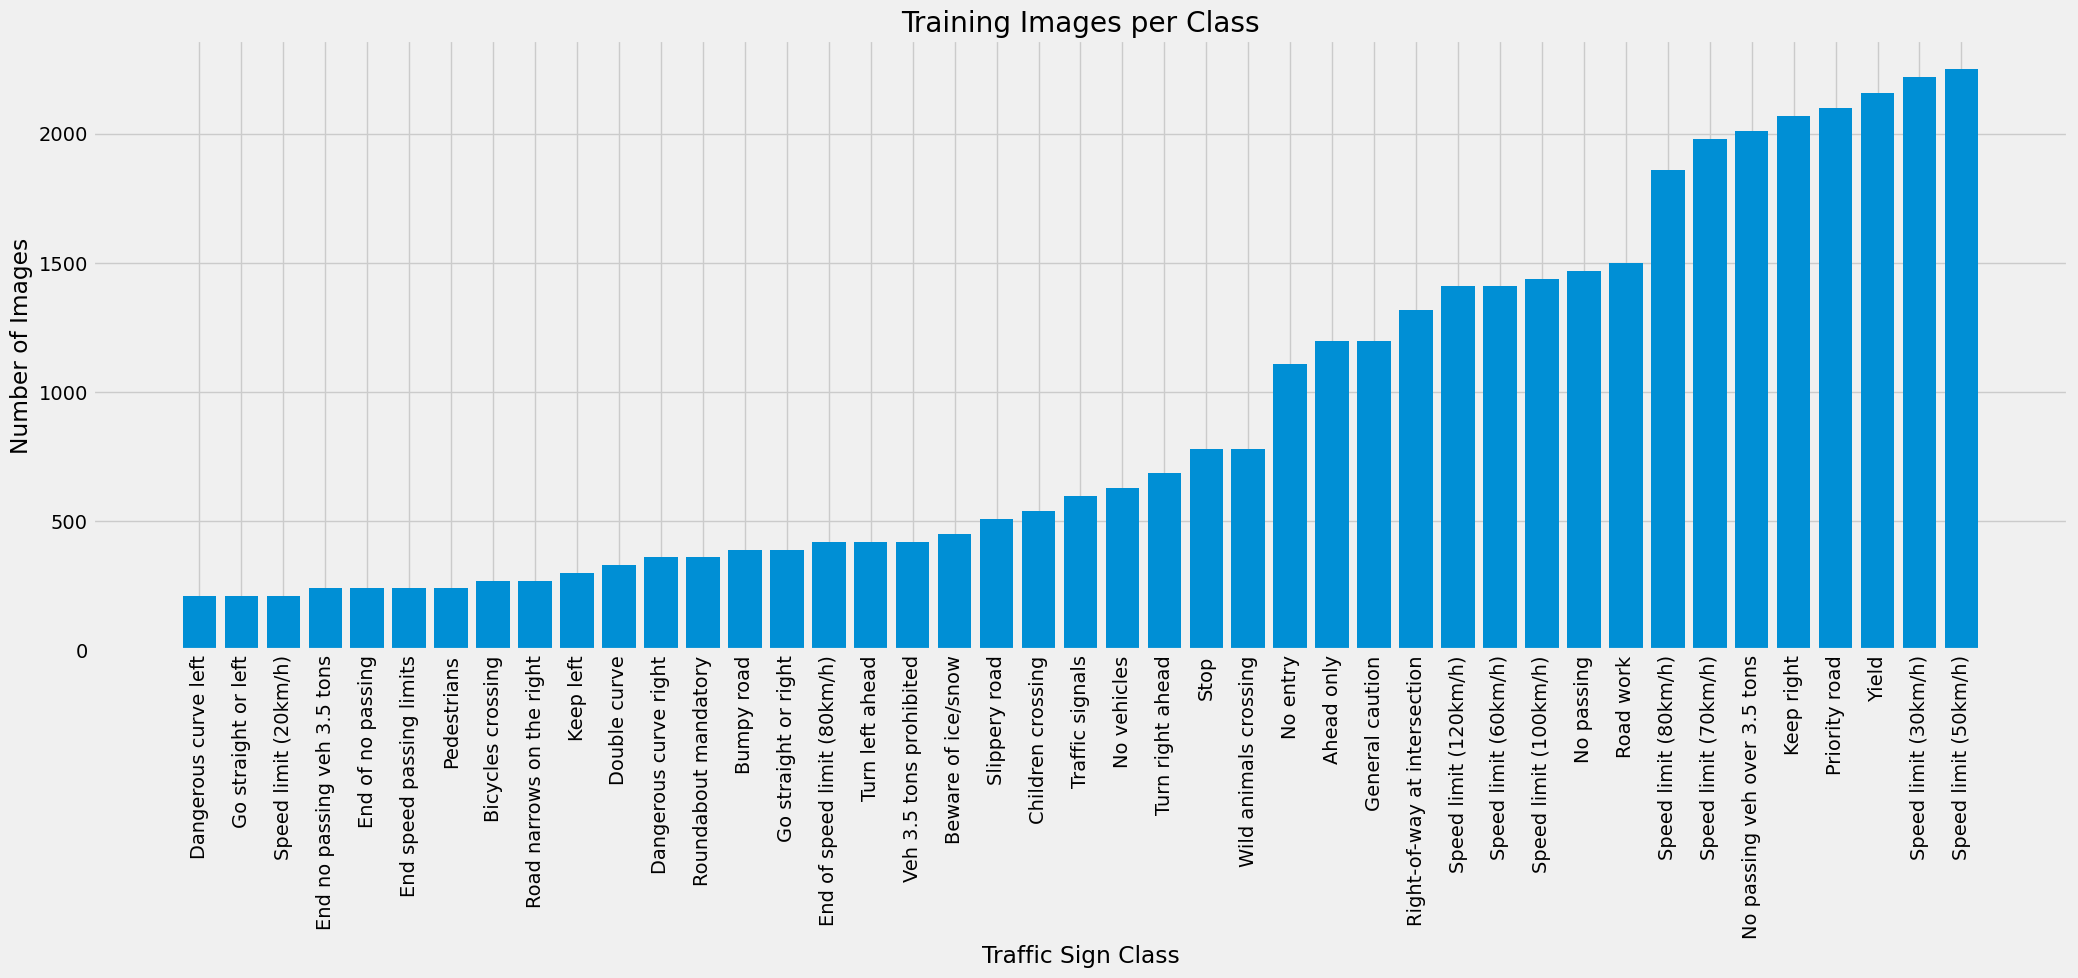

In [5]:
train_path = "Desktop/Traffic cnn/Train"  # Replace with your actual path

folders = os.listdir(train_path)
train_number = []
class_num = []

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    train_files = os.listdir(folder_path)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])  # Make sure 'classes' dict is already defined

# Sorting the dataset based on number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists, reverse=False)  # Optional: reverse=True for descending order
tuples = zip(*sorted_pairs)
train_number, class_num = (list(t) for t in tuples)

# Plotting the number of images in each class
plt.figure(figsize=(21, 10))
plt.bar(class_num, train_number)
plt.xticks(rotation='vertical')
plt.xlabel("Traffic Sign Class")
plt.ylabel("Number of Images")
plt.title("Training Images per Class")
plt.tight_layout()
plt.show()


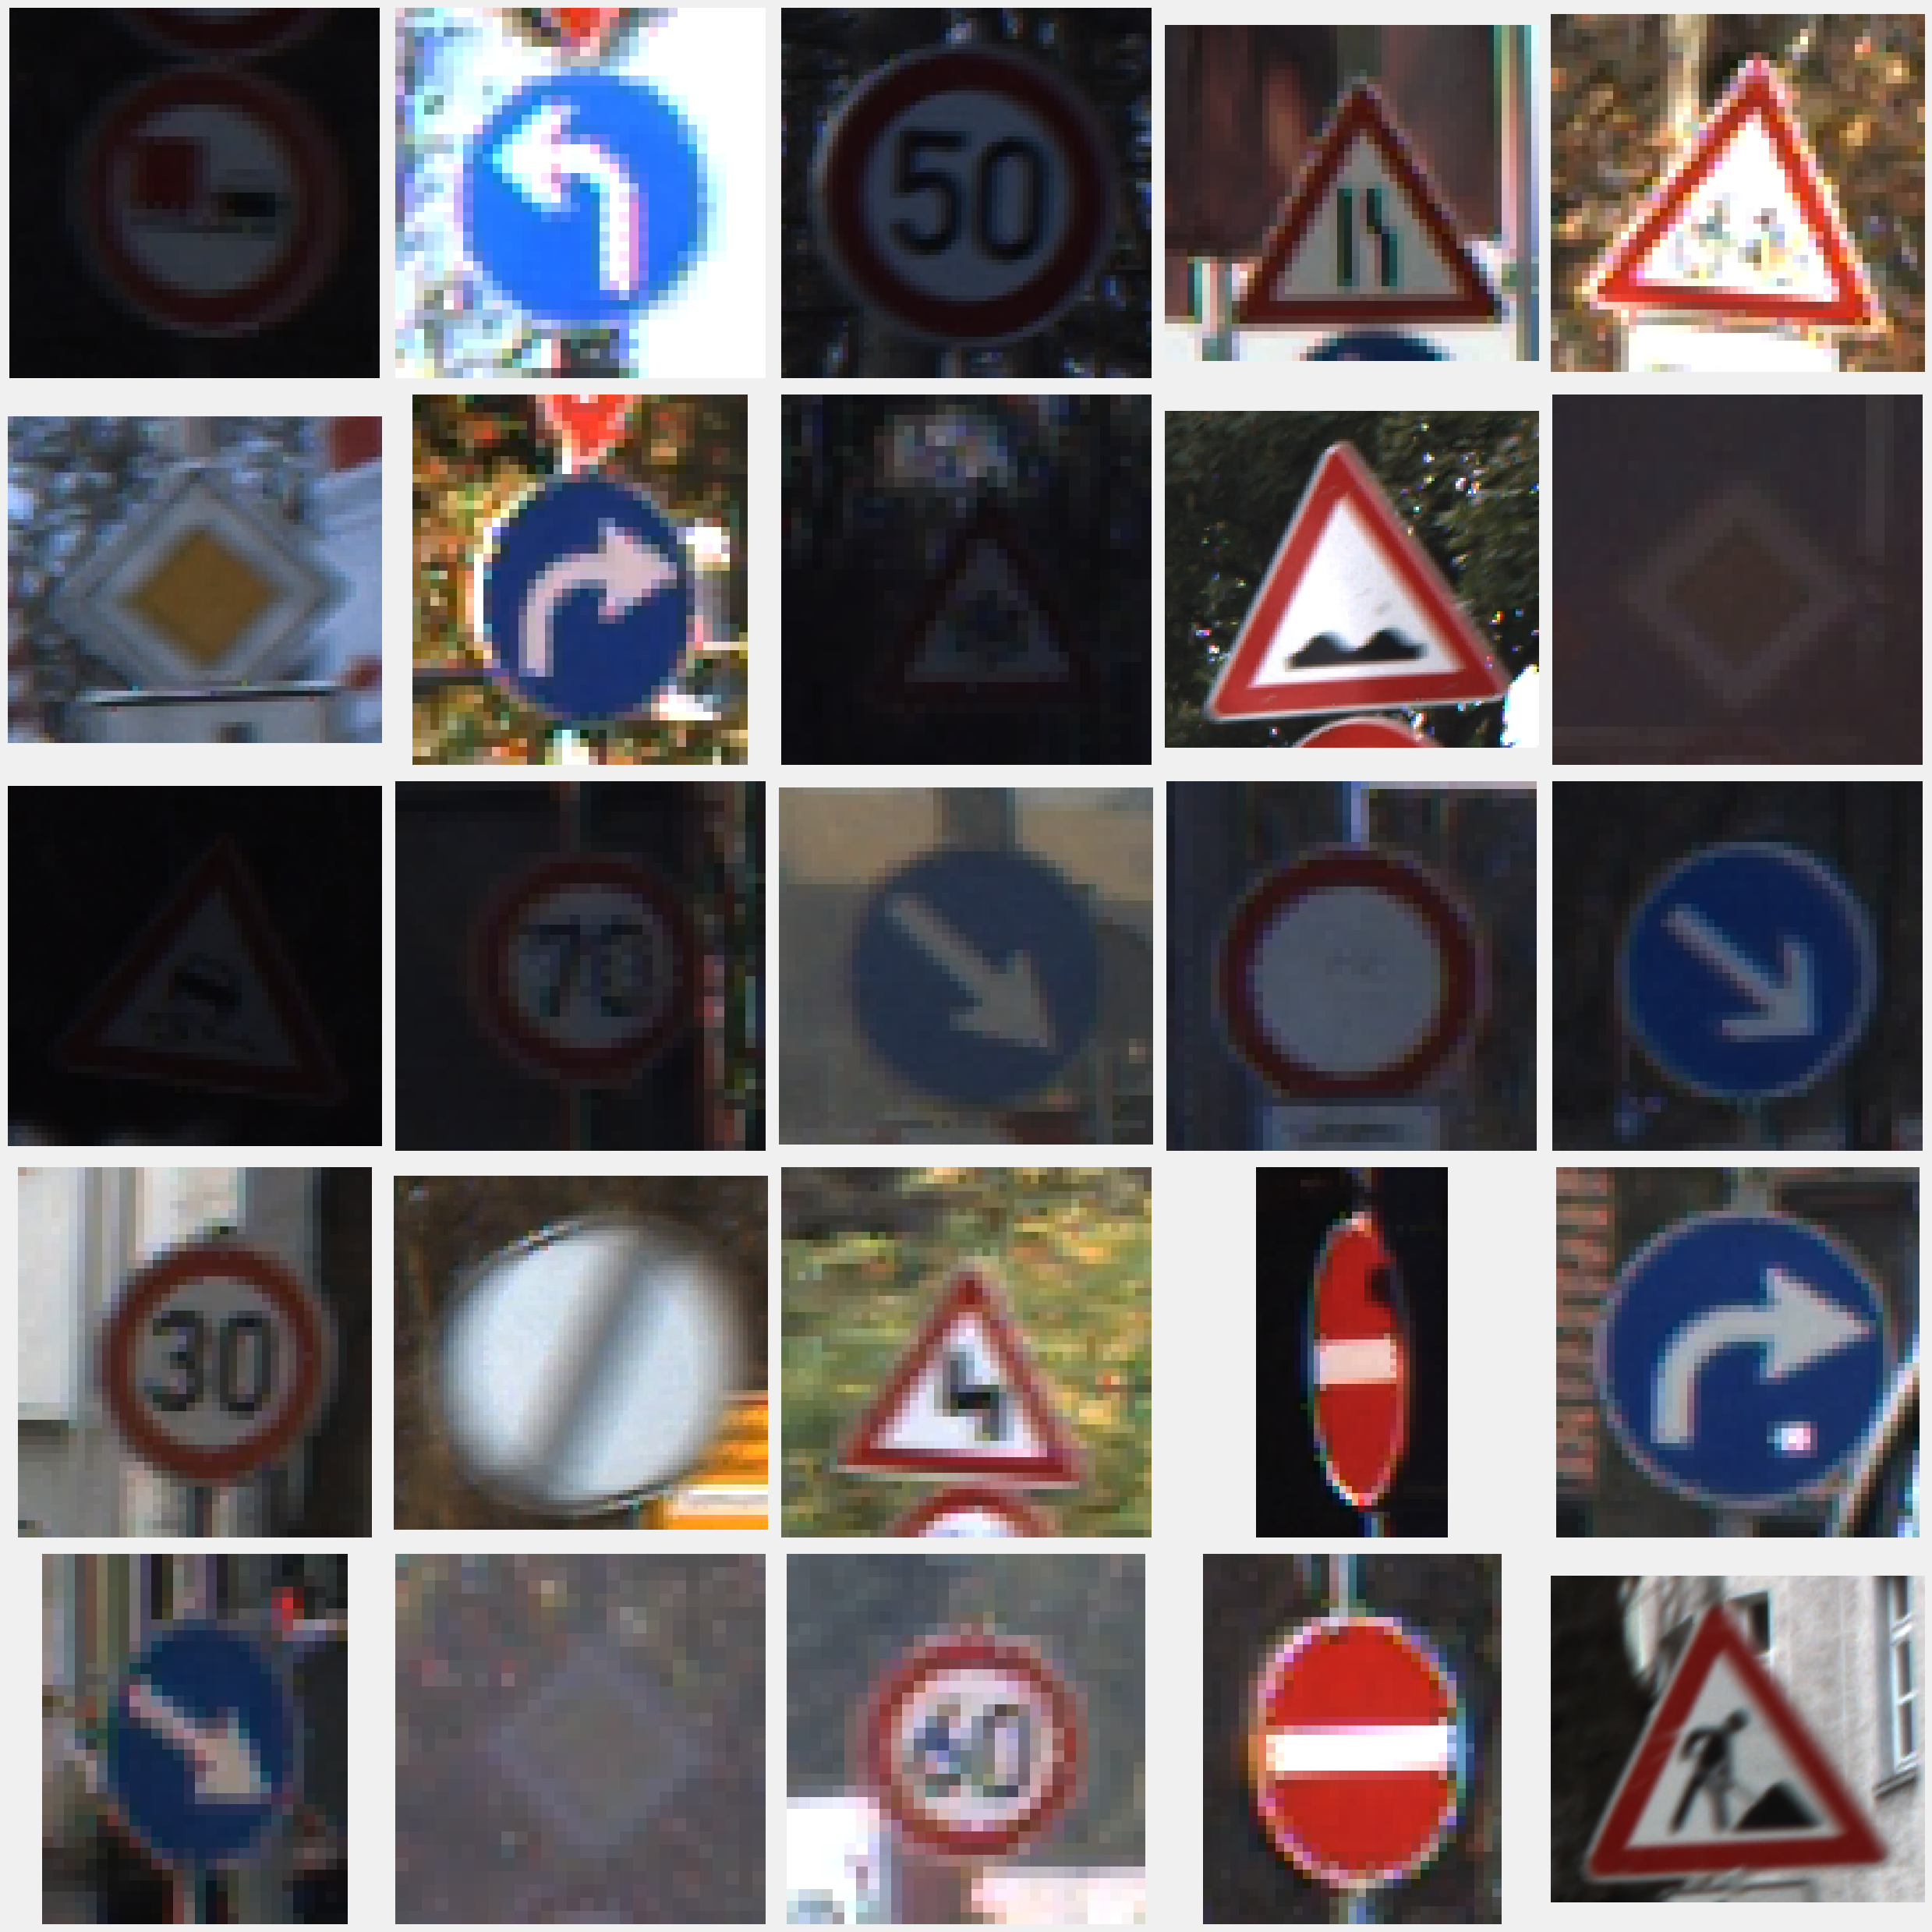

In [6]:
import random
from matplotlib.image import imread

# Assuming data_dir is defined
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25, 25))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_img_path = os.path.join(data_dir, random.choice(imgs))  # safer path join
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.axis('off')  # removes axis ticks and labels
    plt.xlabel(f"Width: {rand_img.shape[1]}", fontsize=20)
    plt.ylabel(f"Height: {rand_img.shape[0]}", fontsize=20)

plt.tight_layout()
plt.show()


In [8]:
image_data = []
image_labels = []
for i in range(NUM_CATEGORIES):
    path = os.path.join(data_dir, 'Train', str(i))
    images = os.listdir(path)
    
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            resize_image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)
# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [10]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [19]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [20]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation = 'relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation = 'relu'),
    keras.layers. MaxPool2D (pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

In [21]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001
epochs = 30

opt = Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [22]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 114s 125ms/step - accuracy: 0.4896 - loss: 2.0833 - val_accuracy: 0.9624 - val_loss: 0.1271
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 122s 143ms/step - accuracy: 0.9237 - loss: 0.2469 - val_accuracy: 0.9849 - val_loss: 0.0507
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 112s 130ms/step - accuracy: 0.9591 - loss: 0.1327 - val_accuracy: 0.9862 - val_loss: 0.0429
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 377s 439ms/step - accuracy: 0.9659 - loss: 0.1107 - val_accuracy: 0.9900 - val_loss: 0.0314
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 121s 141ms/step - accuracy: 0.9768 - loss: 0.0761 - val_accuracy: 0.9929 - val_loss: 0.0249
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 107s 125ms/step - accuracy: 0.9776 - loss: 0.0703 - val_accuracy: 0.9938 - val_loss: 0.0184
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 108s 126ms/step - accuracy: 0.9785 - loss: 0.0657 - val_accuracy: 0.9927 - val_loss: 0.0238
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 147s 131ms/step - accuracy: 0.9797 -

In [23]:
model.save("model.h5")


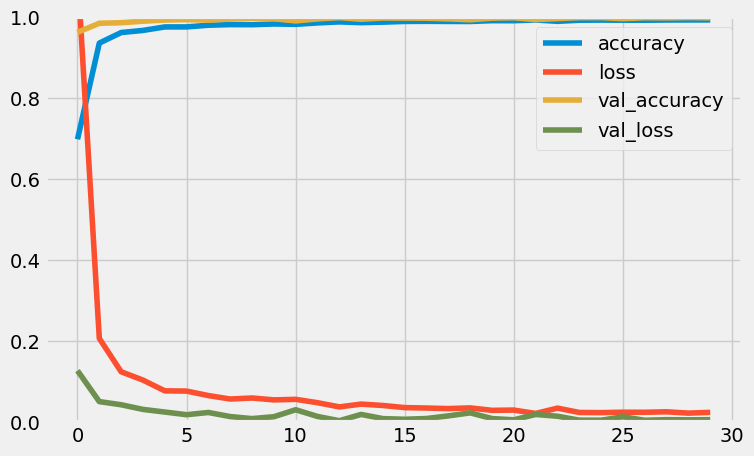

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
import os
import cv2
import numpy as np
import pandas as pd

# Set image size
IMG_HEIGHT = 30
IMG_WIDTH = 30

# Load test CSV
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))
labels = test["ClassId"].values
imgs = test["Path"].values

# Preprocess test images
data = []
for img in imgs:
    try:
        img_path = os.path.join(data_dir, img)
        image = cv2.imread(img_path)
        if image is None:
            print(f"⚠ Failed to load: {img}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resize_image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        data.append(resize_image)
    except Exception as e:
        print("❌ Error in", img, ":", e)

# Convert and normalize test images
X_test = np.array(data) / 255.0

# Predict classes
pred = np.argmax(model.predict(X_test), axis=1)

# Evaluate accuracy
print('✅ Test Data Accuracy:', accuracy_score(labels, pred) * 100, '%')

395/395 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step
✅ Test Data Accuracy: 97.91765637371338 %


In [28]:
from sklearn.metrics import classification_report
print(classification_report(labels,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.99      1.00      0.99       720
           2       0.96      0.99      0.98       750
           3       1.00      0.96      0.98       450
           4       0.99      1.00      0.99       660
           5       0.97      0.97      0.97       630
           6       1.00      0.95      0.97       150
           7       0.99      1.00      1.00       450
           8       1.00      0.99      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      0.98      0.99       420
          12       1.00      0.96      0.98       690
          13       1.00      1.00      1.00       720
          14       0.99      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

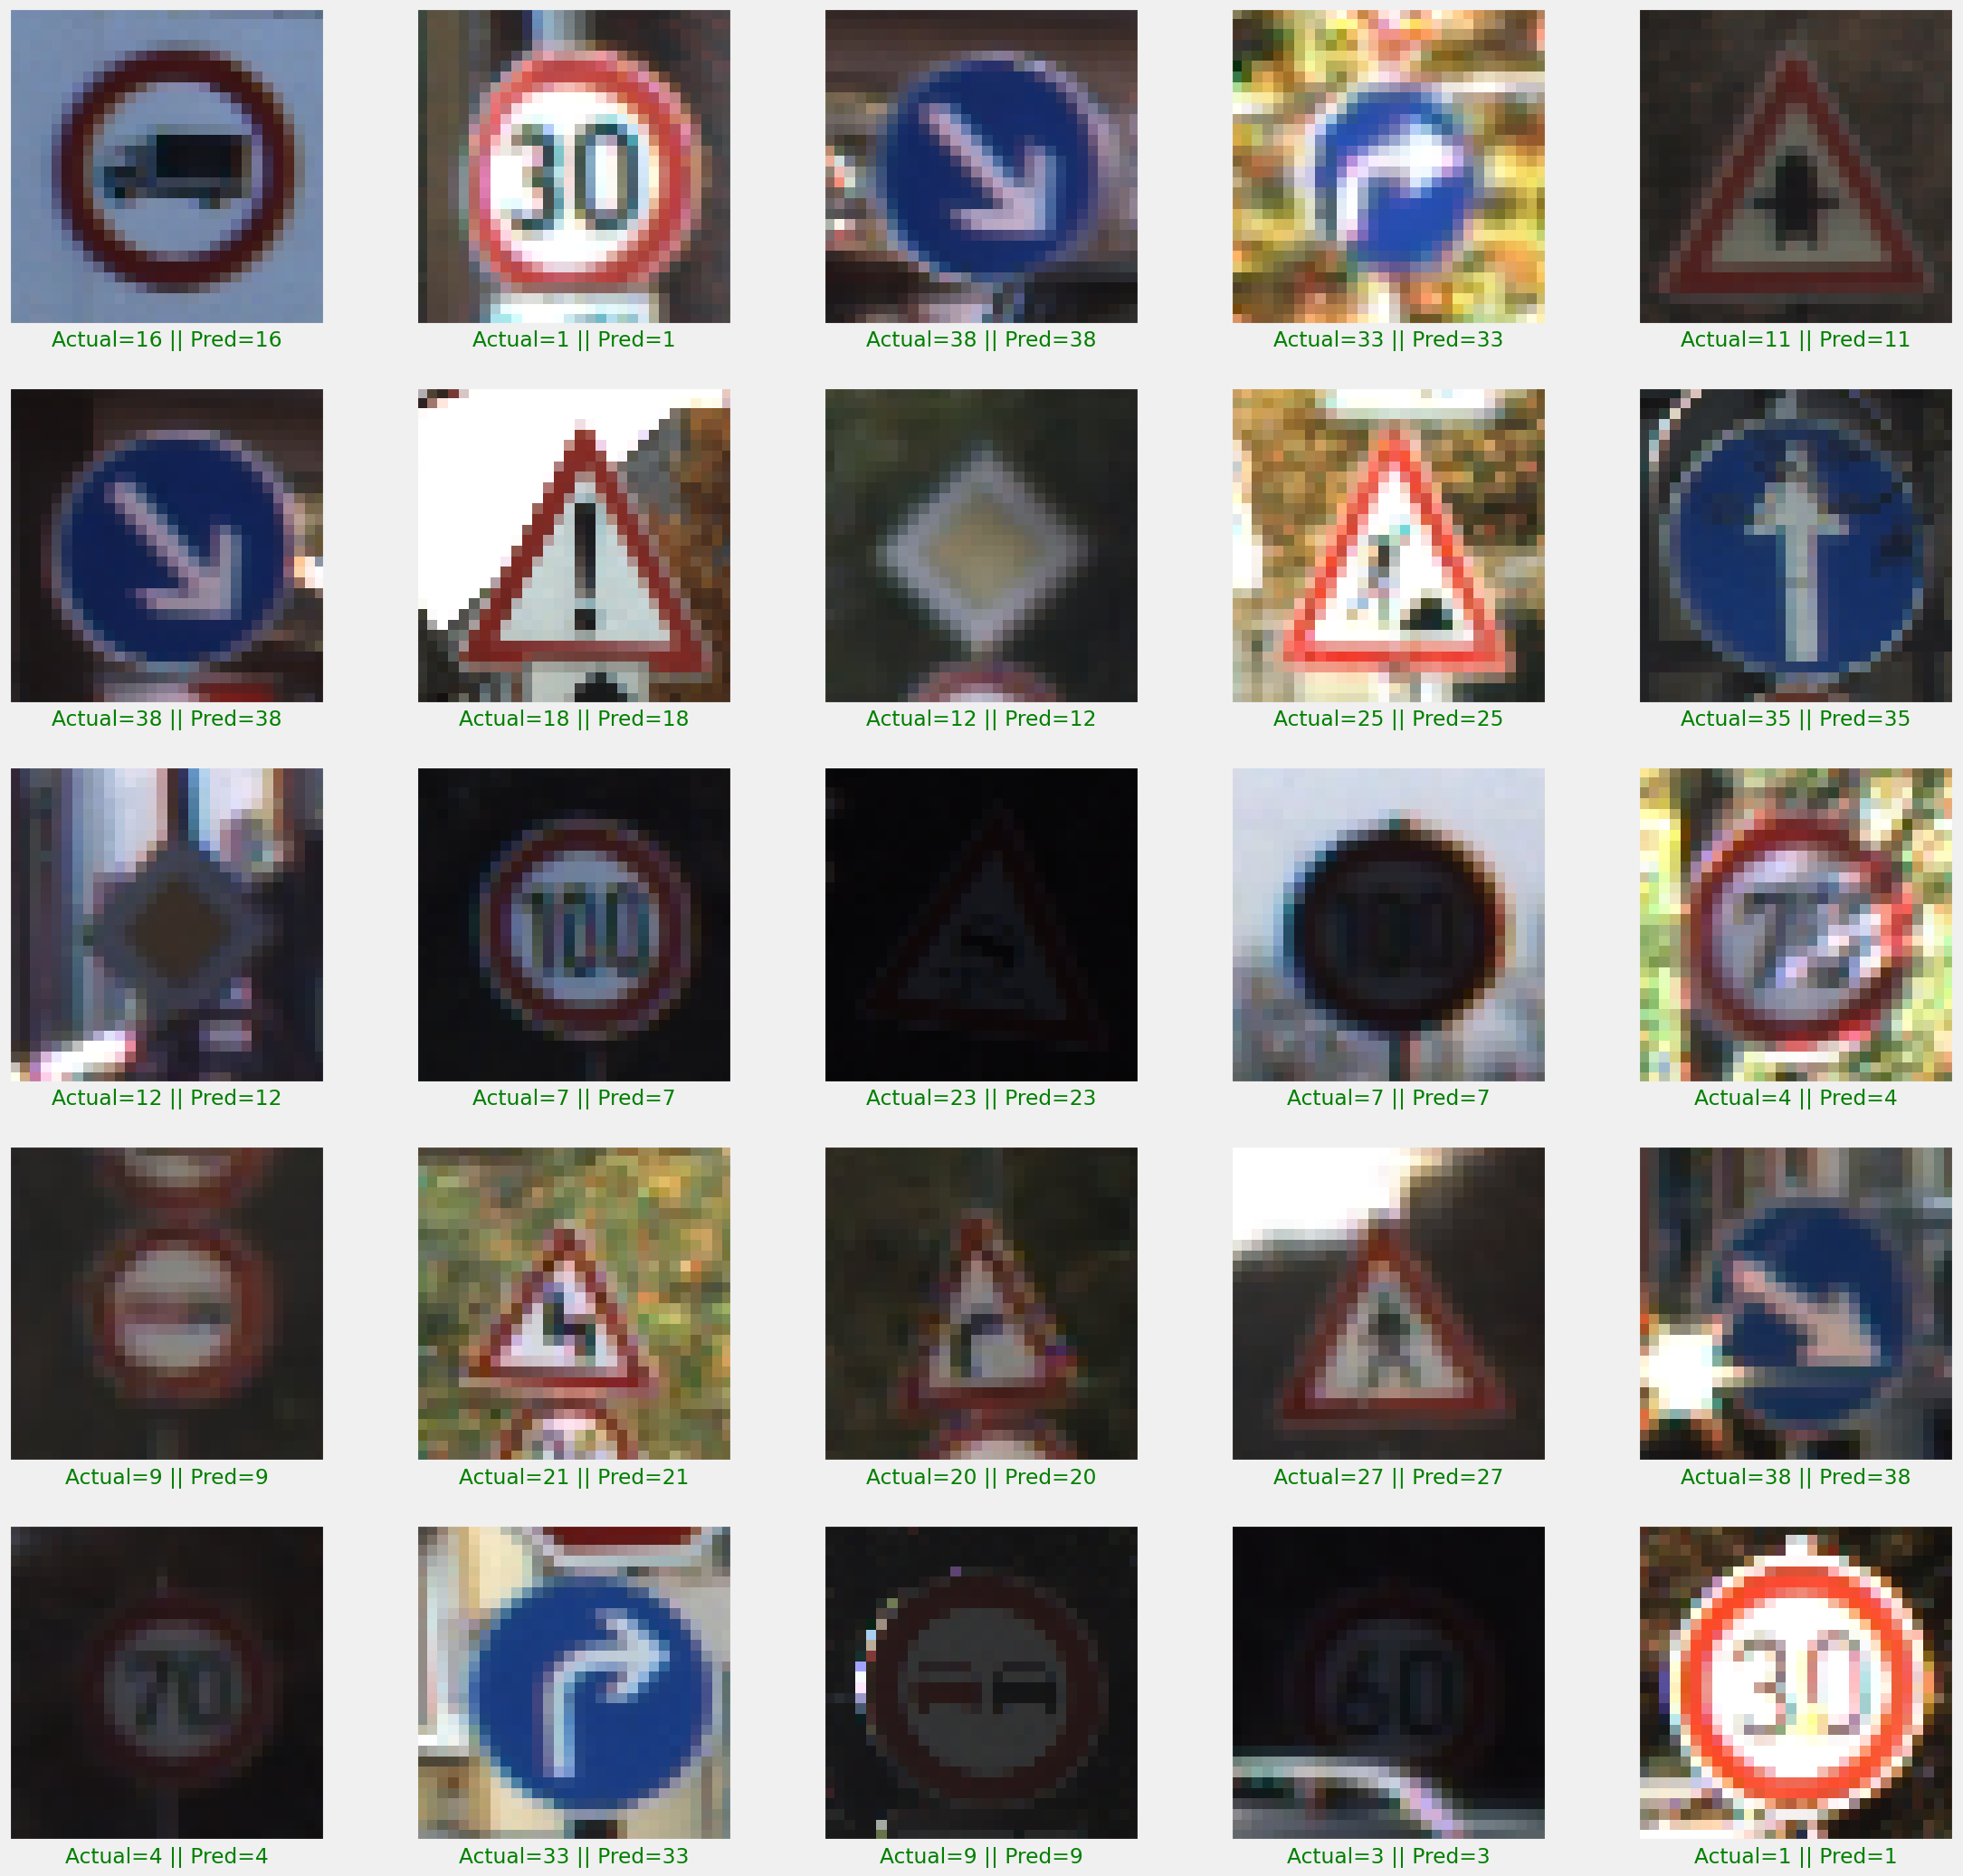

In [29]:
plt.figure(figsize = (25, 25))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()